In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
# Removing all the Null values
df = df.dropna()

In [5]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True,dtype='float')

In [6]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0.0,1.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,0.0,1.0,1.0,0.0
2,40.3,18.0,195.0,3250.0,0.0,1.0,1.0,0.0
4,36.7,19.3,193.0,3450.0,0.0,1.0,1.0,0.0
5,39.3,20.6,190.0,3650.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0.0,0.0,1.0,0.0
340,46.8,14.3,215.0,4850.0,0.0,0.0,1.0,0.0
341,50.4,15.7,222.0,5750.0,0.0,0.0,0.0,1.0
342,45.2,14.8,212.0,5200.0,0.0,0.0,1.0,0.0


In [7]:
y = df['species']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rfc = RandomForestClassifier(n_estimators=10,
                             max_features='sqrt',
                             random_state=101)

In [12]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [13]:
pred = rfc.predict(X_test)

In [14]:
pred

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'A

In [20]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [16]:
cm = confusion_matrix(pred,y_test)

In [17]:
cm

array([[39,  1,  0],
       [ 2, 22,  0],
       [ 0,  0, 37]], dtype=int64)

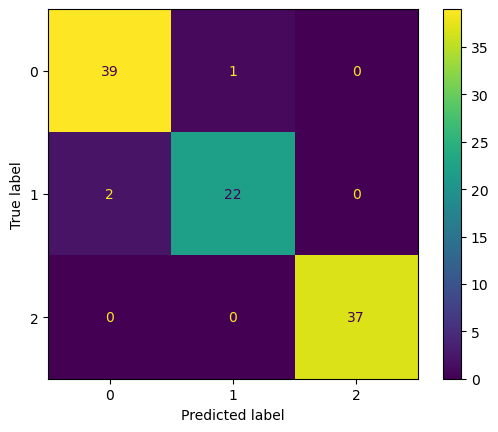

In [19]:
ax = ConfusionMatrixDisplay(confusion_matrix=cm) 
ax.plot()

In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



In [23]:
rfc.feature_importances_

array([0.31867744, 0.1018487 , 0.17343398, 0.21316964, 0.14512091,
       0.03720114, 0.00632264, 0.00422556])